In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
threshold = 0.5
num_std = 1.96
line_width = 2
alpha = 0.2
font_size = 16
x_size = 10
y_size = 10

In [3]:
all_y_trues = []
all_y_probs = []
all_model_names = {'lr': 'L2 Regularized Logistic Regression', 'nb': 'Naive Bayes Classifier'}
colors = ["green", "orange"] #, "orange", "navy"]

for key in all_model_names.keys():

    with open(f'results/{key}_y_trues.pkl', 'rb') as f:
        y_trues = pickle.load(f)

    with open(f'results/{key}_y_probs.pkl', 'rb') as f:
        y_probs = pickle.load(f)
        
    all_y_trues.append(y_trues)
    all_y_probs.append(y_probs)

In [4]:
def print_mean_ci_of_metric_list(metric_list, metric_name, num_std):
    
    mean_metric = np.mean(metric_list)
    std_metric = np.std(metric_list)
    metric_low = np.maximum(mean_metric - std_metric * num_std, 0)
    metric_high = np.minimum(mean_metric + std_metric * num_std, 1)
    
    print(f"{metric_name}: {round(mean_metric, 3)} [{round(metric_low, 3)} - {round(metric_high, 3)}]")

In [5]:
for y_trues, y_probs, name, color in zip(all_y_trues, all_y_probs, all_model_names.values(), colors):
    
    accuracies, aps, precisions, recalls = [], [], [], []
    for y_true, y_prob in zip(y_trues, y_probs):
        
        y_pred = [1 if x >= threshold else 0 for x in y_prob]
        
        accuracy = metrics.accuracy_score(y_true=y_true, y_pred=y_pred)
        accuracies.append(accuracy)
        
        ap = metrics.average_precision_score(y_true=y_true, y_score=y_prob)
        aps.append(ap)
        
        precision = metrics.precision_score(y_true=y_true, y_pred=y_pred)
        precisions.append(precision)
        
        recall = metrics.recall_score(y_true=y_true, y_pred=y_pred)
        recalls.append(recall)
    
    print(f"\nResults for model: {name}\n")
    print_mean_ci_of_metric_list(accuracies, metric_name='Accuracy', num_std=num_std)
    print_mean_ci_of_metric_list(aps, metric_name='Average Precision', num_std=num_std)
    print_mean_ci_of_metric_list(precision, metric_name='Precision', num_std=num_std)
    print_mean_ci_of_metric_list(recall, metric_name='Recall', num_std=num_std)
    


Results for model: L2 Regularized Logistic Regression

Accuracy: 0.388 [0.019 - 0.758]
Average Precision: 0.827 [0.575 - 1.0]
Precision: 1.0 [1.0 - 1.0]
Recall: 0.25 [0.25 - 0.25]

Results for model: Naive Bayes Classifier

Accuracy: 0.76 [0.477 - 1.0]
Average Precision: 0.739 [0.367 - 1.0]
Precision: 0.8 [0.8 - 0.8]
Recall: 1.0 [1.0 - 1.0]


/home/joel_stremmel/anaconda3/envs/transcripts/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/joel_stremmel/anaconda3/envs/transcripts/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/home/joel_stremmel/anaconda3/envs/transcripts/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


[1, 0, 0, 0, 1, 0, 0, 0, 0, 0] [0.56640955 0.54635666 0.53799924 0.53689349 0.54414952 0.53530853
 0.54137223 0.54558548 0.54635666 0.54635666]
[1, 0, 0, 1, 1, 0, 0, 0] [0.53069211 0.50763485 0.50504771 0.52439905 0.51181324 0.51558784
 0.51558784 0.51135784]
[1, 0, 0, 0, 1, 0, 0] [0.53923229 0.50297269 0.50482105 0.52781715 0.52297296 0.52044547
 0.52024462]
[1, 0, 0, 1, 1, 0, 0, 0] [0.53535278 0.51507025 0.49610442 0.53206574 0.52668066 0.52080602
 0.52900999 0.51594177]
[1, 0, 0, 1, 1, 1, 1] [0.47818021 0.47310402 0.46497984 0.47310402 0.45211256 0.46208719
 0.46922738]
[1, 0, 0, 1, 1, 0, 1, 0] [0.50210094 0.46887221 0.48609829 0.49359632 0.49650383 0.50590028
 0.49016271 0.4916216 ]
[1, 1, 1, 1, 1, 1, 1] [0.4593291  0.44492778 0.44492778 0.45541081 0.44492778 0.42666303
 0.44842946]


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

<Figure size 640x480 with 0 Axes>

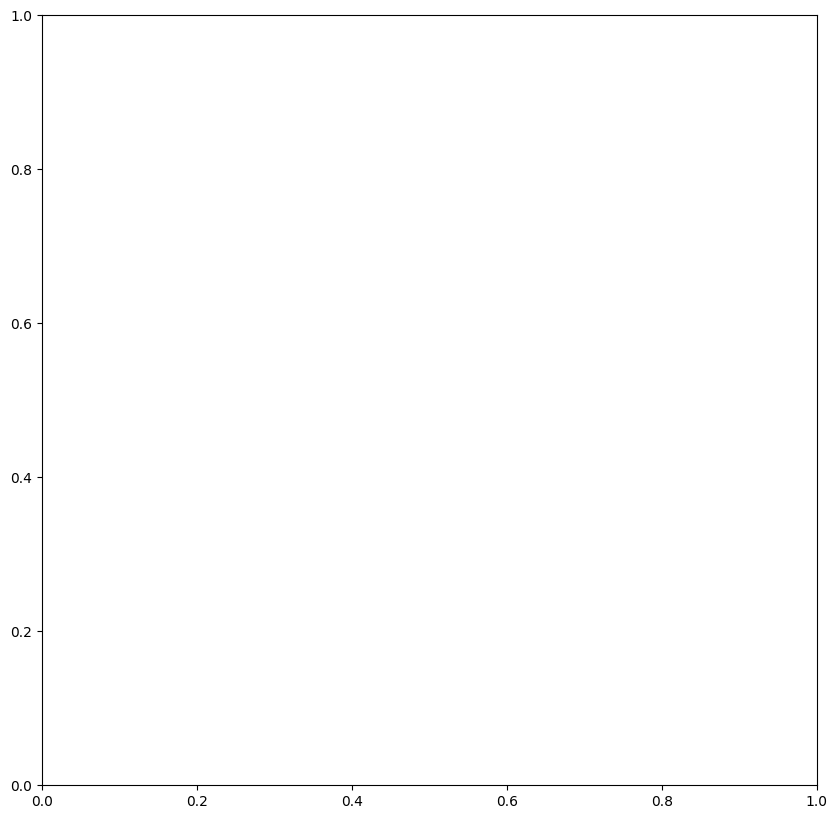

In [6]:
plt.clf()
fig, ax = plt.subplots(1, 1, figsize=(x_size, y_size))

for y_trues, y_probs, name, color in zip(all_y_trues, all_y_probs, all_model_names.values(), colors):

    tprs, aucs = [], []
    mean_fpr = np.linspace(0, 1, 100)
    
    for y_true, y_prob in zip(y_trues, y_probs):
        
        fpr, tpr, _ = metrics.roc_curve(y_true, y_prob)
        
        print(y_true, y_prob)
        auc = metrics.roc_auc_score(y_true, y_prob)
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(auc)
        
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    std_tpr = np.std(tprs, axis=0)
    
    tprs_high = np.minimum(mean_tpr + num_std * std_tpr, 1)
    tprs_low = np.maximum(mean_tpr - num_std * std_tpr, 0)
    
    mean_auc = np.mean(aucs, axis=0)
    std_auc = np.std(aucs, axis=0)
    auc_high = np.minimum(mean_auc + num_stdv * std_auc, 1)
    auc_low = np.maximum(mean_auc + num_stdv * std_auc, 0)
    
    ax.plot(
        mean_fpr,
        mean_tpr,
        color=color,
        lw=line_width,
        label=f"{round(mean_auc, 3)} [{round(auc_low, 3)} - {round(auc_high, 3)}]"
    )
    
    ax.fill_between(
        mean_fpr,
        tprs_low,
        tprs_high,
        color=color,
        alpha=alpha
    )
    
plt.plot([0, 1], [1, 0], color='black', lw=line_width, linestyle='--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(np.arange(0, 1.1, 0.1))
ax.set_yticks(np.arange(0, 1.1, 0.1), minor=True)
ax.set_xticks(np.arange(0, 1.1, 0.1), minor=True)
ax.tick_params(direction='out', length=6, width=0.25, colors='black', labelsize=font_size)
ax_tick_params(axis=both, which='minor', width=0.25)
plt.xlabel('False Positive Rate', fontsize=font_size)
plt.ylabel('True Positive Rate', fontsize=font_size)
plt.legend(loc='best', fontize=font_size)
plt.tight_layout()
plt.savefig('results/roc.png')
plt.show()
plt.close()